In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from tensorflow.keras import regularizers
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

#Indicate all paths to the dataset storage
path_label = '/gdrive/MyDrive/Colab Notebooks/project1/636_project1_train_labels'
path_images = '/gdrive/MyDrive/Colab Notebooks/project1/636_project1_train_images'

#import pickle and load the data from the above path and divide it 1/5 for validation and 4/5 for training so did labels
import pickle
data_labels = pickle.load(open(path_label, 'rb'))
data_images = pickle.load(open(path_images, 'rb'))
val_images = data_images[:12000]
train_images = data_images[12000:]
val_labels = data_labels[:12000]
train_labels = data_labels[12000:]

In [ ]:
inputs = keras.Input(shape=(28,28,1))
#This following layers are put here for minimizing noises in the images by maxpooling and upsampling back
x = layers.Conv2D(filters = 32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

#Just conv and dense layers for output from possible noise minimizing layers
x = layers.Conv2D(filters = 32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters = 128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#regularizers are here to possibly prevent early overfitting
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(32, kernel_regularizer=regularizers.l2(0.002))(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, kernel_regularizer=regularizers.l2(0.002))(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=512,
                    validation_data=(val_images, val_labels))

history_dict = history.history
history_dict.keys()

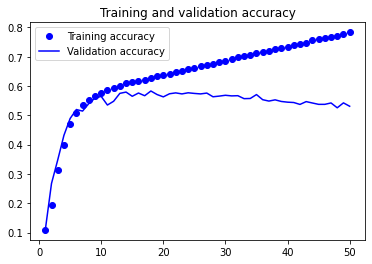

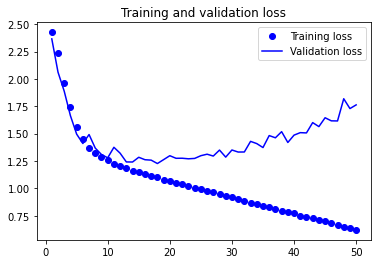

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()